# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

----

# 시작 이전에 맛보기 실습을 해볼게요.

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [ ]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [ ]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제 시 그대로 실행 수정 X)
WORK_SPACE = ""

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# TUTORIAL 데이터 경로
TUTORIAL_PATH = ROOT_PATH + "/tutorial"
TUTORIAL_IMAGE = TUTORIAL_PATH + "/image"


### 3) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [ ]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. 데이터 불러오기
* OpenCV 라이브러리를 활용해서 영상 파일("tutorial.mp4")을 불러오고, 변수명 video에 저장하세요. 
   
    >* 파일경로 TUTORAL_PATH 
    >* 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)

<font color="green">[실습문제]</font> 1. 파일경로 TUTORIAL_PATH 내 "tutorial.mp4" 파일을 가져오세요. 

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 1. 파일경로 VIDEO_PATH 내 "tutorial.mp4" 파일을 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

In [ ]:
# video를 정상적으로 불러왔는지 확인 => True
video.isOpened()

True

<font color="green">[실습문제]</font> 2. 영상 파일의 정보를 확인하세요.
> 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이

In [ ]:
# 실습해보세요
video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT) # 360
video_fps = video.get(cv2.CAP_PROP_FPS) # 24
video_length = video.get(cv2.CAP_PROP_FRAME_COUNT) # 3288

print("가로 : ", video_width)
print("세로 : ", video_height)
print("FPS : ", video_fps)
print("총 프레임 수 : ", video_length)
print("영상 길이 : %d초" %round(video_length/video_fps))

# 사용했던 비디오 반환
video.release()

가로 :  640.0
세로 :  360.0
FPS :  24.0
총 프레임 수 :  3288.0
영상 길이 : 137초


In [ ]:
video.isOpened()

False

## 2. 동영상 프레임 단위로 나눠 이미지 저장하기
* OpenCV 라이브러리를 활용해서 "tutorial.mp4" 파일을 프레임 단위로 잘라내고 저장하세요.   
    * 저장경로 : TUTORIAL_IMAGE : TUTORIAL_PATH + "/image"
    * 파일명 : 1.jpg, 2.jpg, 3.jpg ... 

<font color="green">[실습문제]</font> 3. "tutorial.mp4" 파일을 프레임 단위로 자르고 자른 이미지를 TUTORIAL_IMAGE 경로에 저장하세요.

In [ ]:
# 실습해보세요

TUTORIAL_IMAGE = TUTORIAL_PATH + "/image"

video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")
if not os.path.exists(TUTORIAL_PATH) : 
  os.mkdir(TUTORIAL_IMAGE)

count = 0

while video.isOpened():
  ret, frame = video.read()
  if ret:
    filename = TUTORIAL_IMAGE + "/" + str(count) + ".jpg"
    cv2.imwrite(filename, frame)

  else:
    break
  count += 1

video.release()

In [ ]:
cv2.CAP_PROP_POS_MSEC

0

In [ ]:
# solution 2
TUTORIAL_IMAGE = TUTORIAL_PATH + "/image2"

TIME_MEASUERMENT_UNIT = 5 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(TUTORIAL_IMAGE):
  os.mkdir(TUTORIAL_IMAGE)

video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = TUTORIAL_IMAGE + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break

video.release()

<font color="green">[실습문제]</font> 4. 프레임으로 자른 이미지를 열어보세요. 

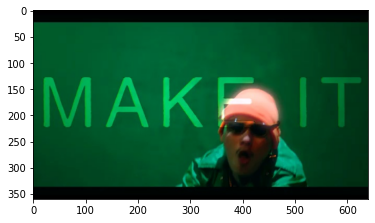

In [ ]:
# 실습해보세요
image = cv2.imread(TUTORIAL_IMAGE + '/100.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)